# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
from pathlib import Path
app_root_dir = Path('..')
sys.path.append(str(app_root_dir / 'src'))
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from zensols.deeplearn.batch import TorchMultiProcessStash
from movie import CliFactory, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.init()

# create a command line application factory
cli_factory = CliFactory.instance(root_dir=app_root_dir)

def create_facade(model: str = 'glove50'):
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = cli_factory.create_facade(['-c', str(app_root_dir / 'models' / f'{model}.conf')])
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review
  feature splits:
    split stash splits:
        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


2021-04-08 17:35:08,634 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58
    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'label', 'glove_50_embedding'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      r

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-04-08 17:35:08,645 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-08 17:35:08,646 [zensols.deeplearn.model.facade] training...
2021-04-08 17:35:08,648 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-04-08 17:35:08,649 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-04-08 17:35:08,709 [zensols.deeplearn.model.executor.status] loaded 47 batches in 0s
2021-04-08 17:35:08,710 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-08 17:35:08,713 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-08 17:35:08,729 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2021-04-08 1

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/08/2021 17:35:08:757529
    ended: 04/08/2021 17:35:11:235764
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 2/2
    ave/min loss: 165.11777/54.09750
    accuracy: 0.170 (1376/8086)
    micro: F1: 0.170, precision: 0.170, recall: 0.170
    macro: F1: 0.169, precision: 0.169, recall: 0.170
    weighted: F1: 0.169, precision: 0.169, recall: 0.170
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 2/2
    ave/min loss: 119.53891/17.42568
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
    weighted: F1: 0.331, precision: 0.248, recall: 0.498
  test:
    started: 04/08/2021 17:35:11:354586
    ended: 04/08/2021 17:35:11:407854
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 132.69687/60.18018
    accuracy: 0.507 (10

movie.model.ReviewNetwork (2)

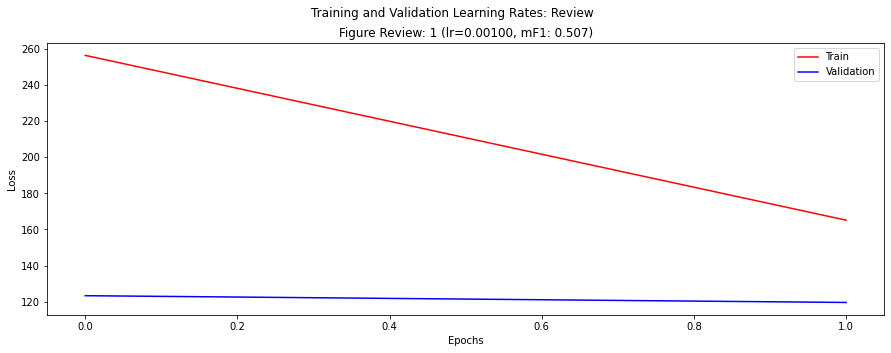

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2021-04-08 17:35:11,699 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-08 17:35:11,700 [zensols.deeplearn.model.facade] training...
2021-04-08 17:35:11,701 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-04-08 17:35:11,702 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-08 17:35:11,720 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-08 17:35:11,735 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 75 epochs using learning rate 0.001
  0%|                                                                                            | 0/75 [00:00<?, ?it/s]2021-04-08 17:35:11,737 [zensols.deeplearn.model.executor.status] watching update file ../target/update.json
tr:111.390|va min:92.234|va:92.193 \/: 100%|████████████████████████████████████████████| 75/75 [0

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/08/2021 17:35:11:738113
    ended: 04/08/2021 17:37:13:973933
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 75/75
    ave/min loss: 111.38976/26.61956
    accuracy: 0.705 (5702/8086)
    micro: F1: 0.705, precision: 0.705, recall: 0.705
    macro: F1: 0.705, precision: 0.707, recall: 0.705
    weighted: F1: 0.705, precision: 0.707, recall: 0.705
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 75/75
    ave/min loss: 92.19264/11.79039
    accuracy: 0.732 (753/1029)
    micro: F1: 0.732, precision: 0.732, recall: 0.732
    macro: F1: 0.730, precision: 0.741, recall: 0.732
    weighted: F1: 0.729, precision: 0.741, recall: 0.732
  test:
    started: 04/08/2021 17:37:14:729346
    ended: 04/08/2021 17:37:14:782701
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 107.42320/44.24649
    accuracy: 0.707 

movie.model.ReviewNetwork (2)

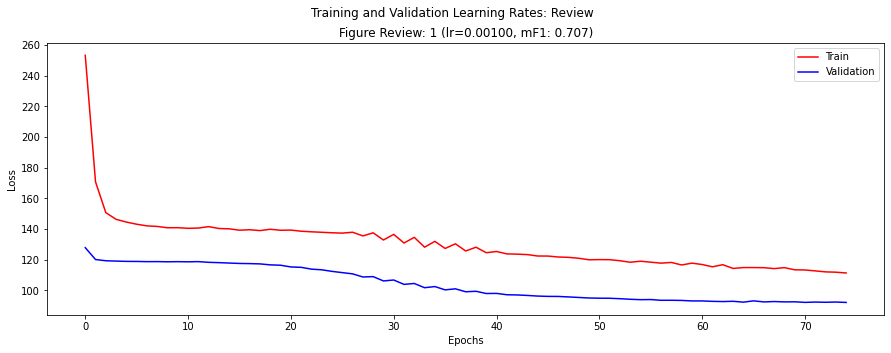

In [5]:
facade.epochs = 75
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-04-08 17:41:47,297 [zensols.deepnlp.embed.word2vec] reading binary vector file
2021-04-08 17:41:47,299 [zensols.deepnlp.embed.word2vec] loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2021-04-08 17:42:19,400 [zensols.deepnlp.embed.word2vec] loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 32s
2021-04-08 17:42:19,401 [zensols.deepnlp.embed.word2vec] loaded word2vec model in 32s
2021-04-08 17:42:30,772 [zensols.deepnlp.embed.word2vec] created data structures in 11s
2021-04-08 17:42:31,414 [zensols.deepnlp.embed.domain] created tensor vectory matrix on use cuda: True, device: cuda:0
2021-04-08 17:42:32,547 [zensols.deeplearn.model.facade] clearing
2021-04-08 17:42:32,979 [zensols.deeplearn.model.facade] creating new executor
2021-04-08 17:42:32,984 [zensols.deepnlp.embed.domain] reusing already cached from use cuda: True, device: cuda:0
2021-04-08 17:42:32,998 [zensols.deeplea

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/08/2021 17:42:42:527937
    ended: 04/08/2021 17:44:02:302378
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 54/55
    ave/min loss: 87.13799/12.28687
    accuracy: 0.797 (6441/8086)
    micro: F1: 0.797, precision: 0.797, recall: 0.797
    macro: F1: 0.796, precision: 0.799, recall: 0.797
    weighted: F1: 0.796, precision: 0.799, recall: 0.797
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 45/55
    ave/min loss: 84.79451/9.51102
    accuracy: 0.761 (783/1029)
    micro: F1: 0.761, precision: 0.761, recall: 0.761
    macro: F1: 0.760, precision: 0.765, recall: 0.761
    weighted: F1: 0.760, precision: 0.765, recall: 0.761
  test:
    started: 04/08/2021 17:44:06:286195
    ended: 04/08/2021 17:44:06:343884
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 90.62722/35.75870
    accuracy: 0.768 (16

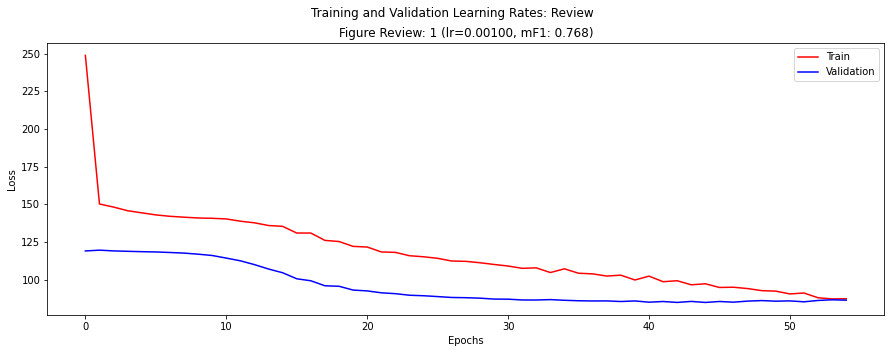

In [6]:
facade.epochs = 45
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
#facade.persist_result()

2021-04-08 18:14:23,867 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-08 18:14:23,868 [zensols.deeplearn.model.facade] training...
2021-04-08 18:14:23,869 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-04-08 18:14:23,870 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-08 18:14:24,496 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-08 18:14:25,095 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 55 epochs using learning rate 0.001
  0%|                                                   | 0/55 [00:00<?, ?it/s]2021-04-08 18:14:25,098 [zensols.deeplearn.model.executor.status] watching update file ../target/update.json
tr:84.374|va min:83.134|va:83.668 /\: 100%|████| 55/55 [01:22<00:00,  1.04s/it]2021-04-08 18:15:47,854 [zensols.deeplearn.model.executor.st

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/08/2021 18:14:25:098732
    ended: 04/08/2021 18:15:47:855600
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 55/55
    ave/min loss: 84.37356/12.81179
    accuracy: 0.809 (6543/8086)
    micro: F1: 0.809, precision: 0.809, recall: 0.809
    macro: F1: 0.809, precision: 0.810, recall: 0.809
    weighted: F1: 0.809, precision: 0.810, recall: 0.809
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 48/55
    ave/min loss: 83.13426/8.26036
    accuracy: 0.781 (804/1029)
    micro: F1: 0.781, precision: 0.781, recall: 0.781
    macro: F1: 0.781, precision: 0.785, recall: 0.782
    weighted: F1: 0.781, precision: 0.785, recall: 0.781
  test:
    started: 04/08/2021 18:15:50:248065
    ended: 04/08/2021 18:15:50:304742
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 91.82487/37.72366
    accuracy: 0.777 (16

movie.model.ReviewNetwork (2)

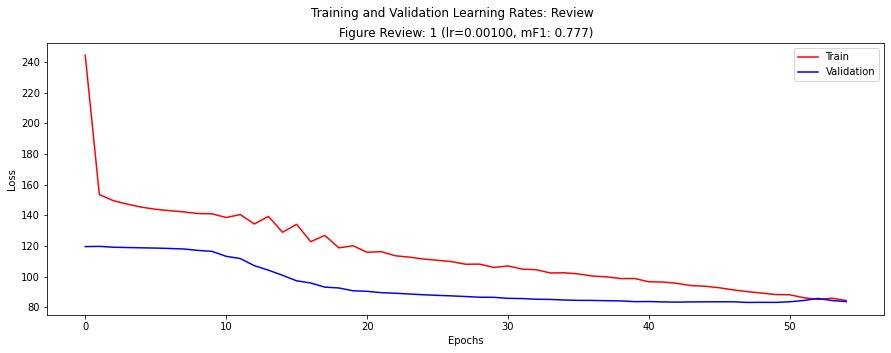

In [10]:
facade.dropout = 0.1
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-04-08 19:35:24,470 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-08 19:35:24,471 [zensols.deeplearn.model.facade] training...
2021-04-08 19:35:24,472 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-04-08 19:35:24,473 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-08 19:35:24,479 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-08 19:35:24,500 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 100 epochs using learning rate 0.001
  0%|                                                  | 0/100 [00:00<?, ?it/s]2021-04-08 19:35:24,503 [zensols.deeplearn.model.executor.status] watching update file ../target/update.json
tr:49.982|va min:84.613|va:136.312 /\: 100%|█| 100/100 [02:03<00:00,  1.02s/it]2021-04-08 19:37:27,654 [zensols.deeplearn.model.executor.s

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/08/2021 19:35:24:503720
    ended: 04/08/2021 19:37:27:655251
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 96/100
    ave/min loss: 37.51627/1.60406
    accuracy: 0.917 (7416/8086)
    micro: F1: 0.917, precision: 0.917, recall: 0.917
    macro: F1: 0.917, precision: 0.918, recall: 0.917
    weighted: F1: 0.917, precision: 0.918, recall: 0.917
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 51/100
    ave/min loss: 84.61298/10.85291
    accuracy: 0.749 (771/1029)
    micro: F1: 0.749, precision: 0.749, recall: 0.749
    macro: F1: 0.745, precision: 0.770, recall: 0.750
    weighted: F1: 0.745, precision: 0.770, recall: 0.749
  test:
    started: 04/08/2021 19:37:28:474737
    ended: 04/08/2021 19:37:28:527778
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 99.48074/34.29576
    accuracy: 0.747 (

movie.model.ReviewNetwork (2)

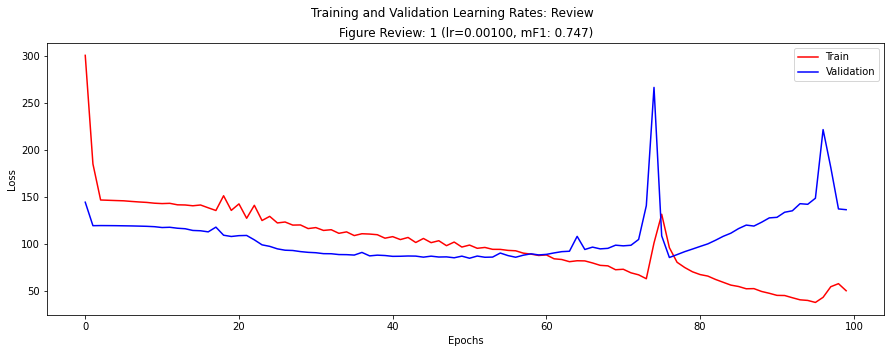

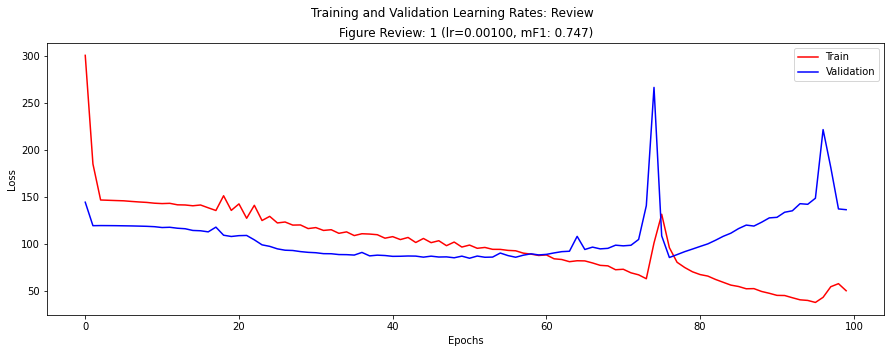

In [15]:
facade.embedding = 'transformer_embedding'
facade.epochs = 100
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.plot_result()

In [18]:
import itertools as it
for b in it.islice(facade.batch_stash.values(), 1):
    b.write()

ReviewBatch
  size: 200
    label: torch.Size([200])
    transformer_embedding: torch.Size([200, 56, 768])
